<a href="https://colab.research.google.com/github/AndreAmorim05/data-science/blob/main/Predi%C3%A7%C3%A3o_de_Faturamento_do_Novo_Filme_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><strong><h1>Predição de Faturamento do Novo Filme 007</h1></strong>
<center><img src="https://super.abril.com.br/wp-content/uploads/2021/09/SI_431_Abre-Playlist_gra%CC%81fico.png" width=80%></img></center>

<center><h6>Fonte: https://super.abril.com.br/cultura/qual-james-bond-matou-mais-e-qual-tomou-mais-biritas/ - acesso em 28/10/2021</h6>




> 1)	Considerando que o próximo filme do 007 terá 16 unidades de álcool e 25 mortes, qual o faturamento esperado? Justifique seu raciocínio e o método utilizado, apresentando também a fórmula de cálculo e suas métricas.




# Considerações iniciais
Para realização deste desafio algumas considerações iniciais serão tomadas para facilitar a exploração dos dados fornecidos e o desenvolvimento de um *dataset* capaz de alimentar um modelo preditivo com boa acurácia em suas previsões. Abaixo serão descritos os passos necessários para obtenção do *dataset*.


# Interpretação dos dados
O infográfico fornecido traz os dados de forma a simplificar a leitura e entendimento do leitor mesmo que este não tenha um conhecimento aprofundado sobre o assunto ou em interpretação de dados visuais, porém a forma como devemos proceder para construir nosso modelo preditivo necessita de uma abstração desses dados para que a máquina seja capaz de identificar os padrões mais fielmente.

O entendimento dos dados é o primeiro e o mais primordial passo para o desenvolvimento da lógica, já que um bom modelo se baseia em uma boa compreensão dos dados pelo cientista de dados, pelo contrário, os valores obtidos dos modelos de *machine learning* serão inconclusivos e pouco irão condizer com o que se deve esperar na realidade.

Como dito anteriormente o que podemos extrair do infográfico deve ser abstraído, em outras palavras simplificado, e trazido ao nosso contexto em uma visão mais analítica, a seguir estão listadas todas as variáveis fornecidas pelo infográfico:


*   Ator;
*   Quantidade de filmes por ator;
*   Período de lançamento do(s) filme(s);
*   Média de unidades de álcool consumida pelo ator nos filmes interpretados;
*   Médias de mortes causadas pelo ator nos filmes interpretados;
*   Bilheteria mundial média, por filme em US$.

Continuando a análise podemos extrair mais três dados importantes:

1.   Os valores da bilheteria são ajustados de acordo com a inflação, isso faz com que os valores mesmo de décadas atrás sejam trazidos a valores presentes, para uma comparação mais fiel;
2.   Os números de Daniel Craig consideram apenas os 4 filmes já lançados, apesar de vermos 5 filmes no seu quantitativo, apenas quatro compõe sua base de cálculo, este filme extra no infográfico apenas remete ao próximo filme que ainda será lançado estrelado pelo ator;
3.   A média elevada de Craig se deve a 007 Contra Spectre (2015), no qual ele mata 229 pessoas - a maioria delas em uma explosão no quartel-general do vilão Ernst Blofeld (Cristoph Waltz) provocada por ele. Esta informação será abordada no tópico seguinte mais profundamente.


In [ ]:
# importando blibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set()

# Tratamento dos dados

Antes de introduzir os conceitos chave dessa seção vamos a uma visualização de dois dados importantes para a nossa problemática presente, a quantidade de mortes e as unidades de álcool, plotando um gráfico de uma em função da outra teremos:

In [ ]:
# declarando os valores
labels = ['Álcool', 'Mortes']
alcool = np.array([11.5,9.5,11.5,4.75,12,16.4])
mortes = np.array([12.5,5,16.6,10,27,68.75])

# criando o Dataframe com os dados declarados
relacao = pd.DataFrame(list(zip(alcool, mortes)), columns=labels)

# apresentando os dados
relacao.head(6)

,Álcool,Mortes
0,11.50,12.50
1,9.50,5.00
2,11.50,16.60
3,4.75,10.00
4,12.00,27.00
5,16.40,68.75


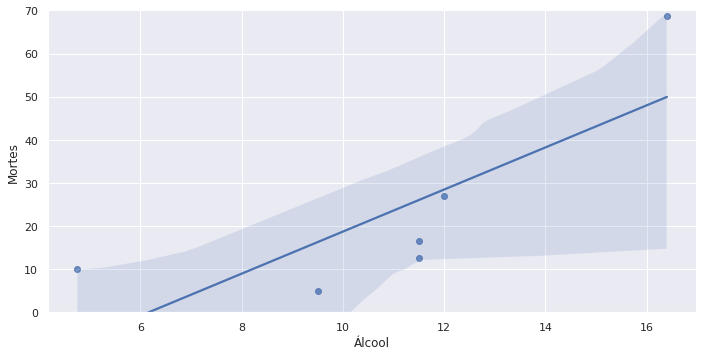

In [ ]:
# instanciando um plot para os dados, alterando os limites do eixo y e em seguida plotando
g = sns.lmplot(x="Álcool", y="Mortes", data=relacao, aspect=2);
g = g.set(ylim=(0,70))
g;

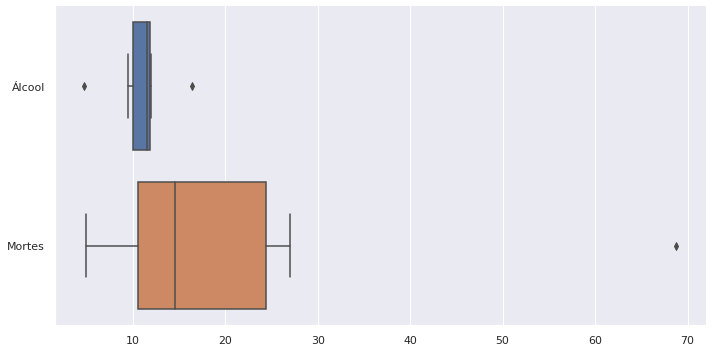

In [ ]:
# plotando um boxplot para análise dadistribuição dos dados
sns.catplot(data=relacao, kind='box', aspect=2, orient='h');

Analisando os gráficos acima, podemos notar que a curva de regressão busca se alinhar de forma a compensar o último dado que está causando um desbalanceamento nos dados, esse desbalanceamento é conhecido como *Outlier*, e podemos ter uma visualização melhor deste no Boxplot, onde o ponto mais à direita na relação de mortes nos indica que este dado se trata de um *Outlier*. Este causa desbalanceamento nos dados, logo deve ser tratado para se ter um estudo mais correto, pois este único dado é capaz de desmantelar todo nosso sistema, para demonstrar visualmente o que ocorre se esse *Outlier* abaixo o mesmo plot será realizado porém agora sem o último dado.

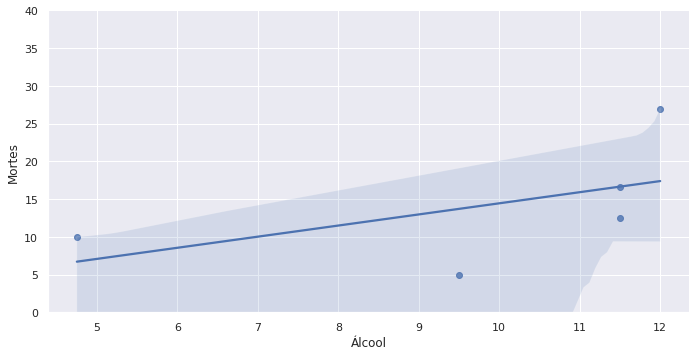

In [ ]:
# declarando novas variáveis com os dados já declarados excluindo apenas os dados do ator Daniel Craig
alcool2 = alcool[:-1]
mortes2 = mortes[:-1]

# definindo um novo Dataframe
relacao2 = pd.DataFrame(list(zip(alcool2, mortes2)), columns=labels)

# instanciando um novo plot para os dados declarados acima, limitando o eixo y e em seguida plotando
g2 = sns.lmplot(x="Álcool", y="Mortes", data=relacao2, aspect=2);
g2 = g2.set(ylim=(0,40))
g2;

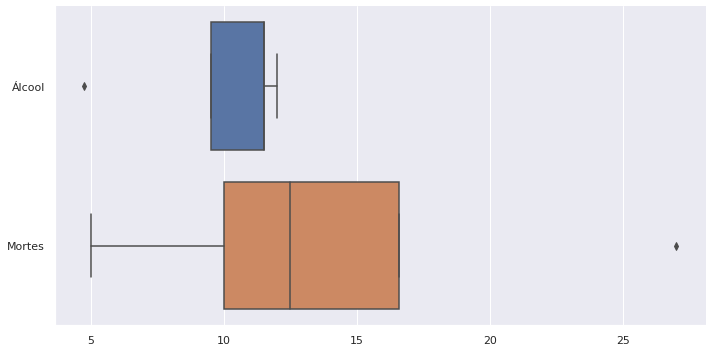

In [ ]:
# plotando um boxplot para análise dadistribuição dos dados
sns.catplot(data=relacao2, kind='box', aspect=2, orient='h');

Como podemos ver é notável o quanto a curva se enquadra melhor a esses dados, pois, todos estão dentro de uma faixa aceitável, portanto esses dados não causam anomalias em nossa análise. Entretanto a forma utilizada para o tratamento do *Outlier* não foi a menos drástica possível, pois acabamos por remover todos os dados do ator Daniel Craig, o que vai causar um desbalanceamento indesejado nos dados que possuimos, limitando a capacidade do nosso modelo de encontrar as estatísticas necessárias para previsões mais acertivas. Logo, a seguir apresentamos uma forma de remover o *Outlier* de forma menos danosa à nossa base de dados.



> Pelo *Boxplot* ainda podemos notar dois *Outliers*, mesmo estes não sendo algo desejado em um *dataset* não iremos intervir nestes em específico já que a base de dados não possui dados suficientes para intervirmos como desejado



## Tratando o *Outlier*

Um dos dados mais importantes para o tratamento do *Outlier* é a informação 3 do tópico **Interpretação dos Dados**, a qual diz:


> A média elevada de Craig se deve a 007 Contra Spectre (2015), no qual ele mata 229 pessoas - a maioria delas em uma explosão no quartel-general do vilão Ernst Blofeld (Cristoph Waltz) provocada por ele.

Logo nosso *Outlier* se deve exclusivamente aos dados deste filme, para a remoção deste *Outlier* sem removermos todos os dados do ator duas considerações devem ser tomadas:


1.   A remoção de um filme não irá impactar significativamente na média de unidades de álcool;
2.   A remoção de um filme não irá impactar significativamente na média de bilheteria dos filmes de Daniel Craig.

Com essas duas condições satisfeitas podemos utilizar de artifícios matemáticos para tratar a quantidade de mortes, como esse dado se caracteriza em torno de uma média iremos escrever a média de mortes como sendo uma variável genérica X, a qual representa a nossa nova média para os 3 filmes que serão considerados, somadas ao nosso *Outlier* de 229 mortes dividido pela quantidade total de filmes sendo igual ao total médio de mortes já fornecido (68,75):

<br>
<h2><center> $\frac{3X+229}{4}$ = 68,75</center></h2>
<br>

Isolando-se o X que representa o valor da nova média teremos:

<br>
<h2><center> X = $\frac{4 \times 68,75 - 229}{3}$ = 15,33</center></h2>
<br>

Logo, ao removermos o filme que desbalanceava nossos dados a média de morte passa a ser aproximadamente de 15,33 por filme.

Ao realizar o plot já visto da relação entre Unidades de Álcool e Mortes agora adicionando a correção dos filmes de Daniel Craig teremos o gráfico corrigido.





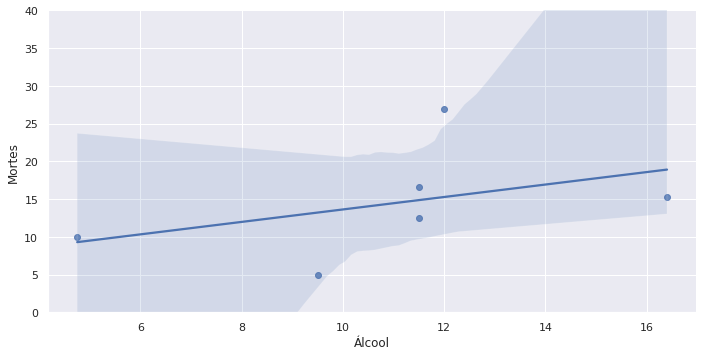

In [ ]:
# definindo os dados com a correção
alcool3 = np.array([11.5,9.5,11.5,4.75,12,16.4])
mortes3 = np.array([12.5,5,16.6,10,27,15.33])

# criando o Dataframe com os dados declarados
relacao3 = pd.DataFrame(list(zip(alcool3, mortes3)), columns=labels)

# instanciando um novo plot para os dados declarados acima, limitando o eixo y e em seguida plotando
g3 = sns.lmplot(x="Álcool", y="Mortes", data=relacao3, aspect=2);
g3 = g3.set(ylim=(0,40))
g3;

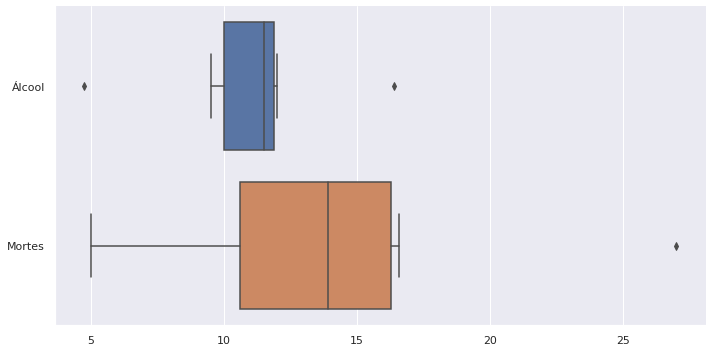

In [ ]:
# plotando um boxplot para análise dadistribuição dos dados
sns.catplot(data=relacao3, kind='box', aspect=2, orient='h');

> Reforçando novamente, apesar de ainda possuirmos dados categorizados como *Outliers*, a base de dados por ser muito pequena nos impossibilita de tratar ou removê-los como foi feito anteriormente, mas em casos em que possuimos muitas entradas a manipulação do *Dataset* pode ser algo menos invasivo, que não é o caso deste projeto, a exclusão indevida de qualquer dado ou sua indevida manipulação pode ser muito danosa ao resultado final da análise.



# Modelando o *Dataset*
Algumas particularidades serão apresentadas na construção deste *Dataset*, pois, a baixa quantidade de dados faz com que o modelo não tenha informações suficientes para entender fucientemente as relações entre cada variável independente e dependente (*target*), logo abaixo será descrito como será a abordagem com cada variável:


1.   Ano de lançamento - esta informação por ser pouco definida, já que os anos de cada filme não são especificados com precisão, apenas uma faixa é dada (exceto para George Lazenby que estreou um único filme), portanto essa informação será relavante apenas para dividirmos nosso *Dataset* entre dados de treino e dados de teste;
2.   Ator - apesar do ator ser uma das chaves mais importantes em uma produção cinematográfica, para a nossa problematica não terá uma relevância para a determinação da bilheteria, pois, nossas predições serão baseadas em filmes futuros que não necessariamente serão interpretados pelos atores anteriores, logo essa será descartada;
3.   Quantidade de filmes - dentre nossos dados este é o único não representado por uma média, portanto por ser uma valor fíxo ele acaba causando anomalias em nossas predições caso seja considerado como um valor inteiro (ex. 1,2,5,10...), para evitar tais anomalias e ainda enriquecer nosso *Dataframe* foi determinado que a quantidade de filmes irá representar a quantidade de vezes que um mesmo conjunto de dados será repetido, como estamos lidando com médias não há danos aos dados caso hajam linhas repetidas, isso irá apenas acrescentar um peso maior aos dados mais presentes na hora do modelo identificar os padrões;
4.   Média de unidades de álcool - este se manterá inalterado;
5.   Média de mortes - está será alterada de acordo com o tratamento de dados já realizado, impactando na exclusão de um dos filmes;
6.   Bilheteria - este se manterá inalterado.




In [ ]:
lb = ['ator', 'anos','alcool','mortes','bilheteria']
dt = np.array([['Sean Connery','1962-1967/1971',11.5,12.5,809.2],
               ['Sean Connery','1962-1967/1971',11.5,12.5,809.2],
               ['Sean Connery','1962-1967/1971',11.5,12.5,809.2],
               ['Sean Connery','1962-1967/1971',11.5,12.5,809.2],
               ['Sean Connery','1962-1967/1971',11.5,12.5,809.2],
               ['Sean Connery','1962-1967/1971',11.5,12.5,809.2],
               ['George Lazenby','1969',9.5,5,563],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Roger Moore','1973-1985',11.5,16.6,613],
               ['Timothy Dalton','1987-1989',4.75,10,370.7],
               ['Timothy Dalton','1987-1989',4.75,10,370.7],
               ['Pierce Brosnan','1995-2002',12,27,568.6],
               ['Pierce Brosnan','1995-2002',12,27,568.6],
               ['Pierce Brosnan','1995-2002',12,27,568.6],
               ['Pierce Brosnan','1995-2002',12,27,568.6],
               ['Daniel Craig','2006-2021',16.4,15.33,897.3],
               ['Daniel Craig','2006-2021',16.4,15.33,897.3],
               ['Daniel Craig','2006-2021',16.4,15.33,897.3],
               ])

df = pd.DataFrame(dt,columns=lb)
df.head()

,ator,anos,alcool,mortes,bilheteria
0,Sean Connery,1962-1967/1971,11.5,12.5,809.2
1,Sean Connery,1962-1967/1971,11.5,12.5,809.2
2,Sean Connery,1962-1967/1971,11.5,12.5,809.2
3,Sean Connery,1962-1967/1971,11.5,12.5,809.2
4,Sean Connery,1962-1967/1971,11.5,12.5,809.2


## Dados de treino e teste
Como dito no quesito 1 do tópico **Modelando o Dataset**, nossos dados serão divididos de acordo com a data de lançamento, foi optado por se dividir como dados de treino os filmes lançados antes da década de 90 e após serão os dados de teste, podemos fazer isso devido aos dados de bilheteria estarem ajustados de acordo com a inflação, caso contrário outra abordagem deveria ser tomada na hora de se dividir o *Dataset*.
A própria biblioteca do *Scikit Learn* já fornece uma função para realizar essa separação de dados, porém, para nosso caso utilizá-la causaria um *Overfitting*, que significa que o modelo irá se adequar muito bem aos dados de treino e será muito ruim em conseguir prever novos dados.

In [ ]:
# dividindo os dados entre variáveis independentes X e dependentes y
X = df.drop(['bilheteria','anos'], axis=1)
y = df[['ator','bilheteria']]


# divisão dos dados independentes para treino
X_train = X[(X['ator'] != 'Pierce Brosnan') & (X['ator'] != 'Daniel Craig')]
X_train = X_train.drop('ator', axis=1)

# divisão dos dados dependentes para treino
y_train = y[(y['ator'] != 'Pierce Brosnan') & (y['ator'] != 'Daniel Craig')]
y_train = y_train.drop('ator', axis=1)

# divisão dos dados independentes para teste
X_test = X[(X['ator'] == 'Pierce Brosnan') | (X['ator'] == 'Daniel Craig')]
X_test = X_test.drop('ator', axis=1)

# divisão dos dados dependentes para teste
y_test = y[(y['ator'] == 'Pierce Brosnan') | (y['ator'] == 'Daniel Craig')]
y_test = y_test.drop('ator', axis=1)


# Determinando o Modelo de *Machine Learning*
Através de uma breve análise dos dados é notável que nossos dados serão melhor explorados em modelos que trabalham com regressão, já que estamos lidando com um *target* de valor contínuo, para determinar o modelo ideal abaixo temos um estudo de alguns modelos.

In [ ]:
# função para determinação de desempenho do modelo treinado
def desempenho(model, X_test):
  # fazer previsão em cima de novos dados
  y_pred = model.predict(X_test)
  # avaliando o desempenho do modelo
  print('R2 Score:\t', r2_score(y_test, y_pred))
  print('MAE:\t\t', mean_absolute_error(y_test, y_pred))
  print('MSE:\t\t', mean_squared_error(y_test, y_pred))
  print("""
  O R2 SCORE representa o quão melhor nosso modelo é quando comparado ao cálculo da variância 
  dos dados, o quanto ele pode explicar melhor o comportamento dos valores, isto está 
  ligado diretamente à questões de quão bem nosso modelo está ajustado para predição, 
  quanto mais próximo de 1 melhor o modelo, o valor pode se apresentar negativo, o que 
  indica que os calculos da variância do modelo sobressaem-se aos calculos da variância 
  dos dados, mostrando que este modelo se encontra em uma situação em que a própria 
  variância dos dados representa um melhor modelo preditivo quando comparado ao modelo treinado.

  Com as outras métricas (MAE e MSE) de desempenho podemos avaliar os erros médios entre modelos 
  diferentes, quanto menores forem esses erros melhor é o desempenho do modelo.
  """)

### Cross Validation
Apesar de ser interessante utilizar alguma forma de *Cross Validation* em um projeto de análise de dados, tais métodos são realmente relevantes quando se pode utilizar amostras suficientemente grandes, em que cada divisão seja capaz de representar o *Dataset* por inteiro, para nosso projeto pequenas amostras não necessariamente são capazes de representar nossa base de dados o que exclui em partes a utilização de um cross validation mais amplo, o método mais simplificado que iremos utilizar se baseia apenas em utilizar nossos dados de treino e teste previamente determinados, sem realizar nenhuma repartição extra ou modificação.

## Regressão Linear
A regressão linear é um dos métodos mais simples e utilizados quando se trata de uma base de dados com *target* de valores contínuos, tanto por sua simplicidade quanto por sua boa aproximação para dados que apresentem uma relação direta ou indiretamente proporcional. Sua base de cálculos é relativamente simples onde o modelo se trata de uma reta do tipo $\hat{y} = \theta_0 + \theta_1 x_1$, onde $\hat{y}$ é o valor que desejamos prever.

Um dos métodos de correção dos parâmetros de cálculo da regressão linear é o cálculo de erro quadrático médio (*Mean Squared Error* - MSE) para todos os pontos.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Em essencia essa equação calcula a distância de cada ponto à reta, quanto menor esse erro melhor será a predição realizada pelo nosso modelo. O `scikit-learn` realiza esses cálculos e armazena os coeficientes e o intercepto, que respectivamente são os valores  que alteram a angulação da reta e o valor único que indica onde a curva toca o eixo das ordenadas quando os coeficientes são igual a zero.

In [ ]:
# instanciando modelo e escolhendo os hiperparametros
reg_model = LinearRegression(fit_intercept=True, normalize=True)

# fit do modelo (treinar)
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print('Coeficientes:\t', reg_model.coef_)
print('Intercepto:\t', reg_model.intercept_)

Coeficientes:	 [[ 65.34972488 -19.26574519]]
Intercepto:	 [225.27659173]


In [ ]:
# avaliando o desempenho do modelo
desempenho(reg_model, X_test)

R2 Score:	 0.6877551595863826
MAE:		 90.04456247353473
MSE:		 8261.898304101634

  O R2 SCORE representa o quão melhor nosso modelo é quando comparado ao cálculo da variância 
  dos dados, o quanto ele pode explicar melhor o comportamento dos valores, isto está 
  ligado diretamente à questões de quão bem nosso modelo está ajustado para predição, 
  quanto mais próximo de 1 melhor o modelo, o valor pode se apresentar negativo, o que 
  indica que os calculos da variância do modelo sobressaem-se aos calculos da variância 
  dos dados, mostrando que este modelo se encontra em uma situação em que a própria 
  variância dos dados representa um melhor modelo preditivo quando comparado ao modelo treinado.

  Com as outras métricas (MAE e MSE) de desempenho podemos avaliar os erros médios entre modelos 
  diferentes, quanto menores forem esses erros melhor é o desempenho do modelo.
  


### Informações sobre o modelo treinado
A alteração dos parâmetros do modelo se mostraram irrisórias, nenhum ganho ou perda se mostrou significativo na hora da modelagem, logo os parâmetros padrão da biblioteca foram conservados, já que estes apresentam o resultado base, sendo estes a `normalização` setada como Verdadeiro e o `fit_intercept` também como Verdadeiro, que garante que o intercepto seja calculado, este último sendo o único que traz uma real perda para o nosso modelo caso seja alterado para Falso.

## Árvore de Decisão

As árvores de decisão ou *Decision Trees* são modelos utilizados tanto para regressão quanto classificação. São contruídas a partir indução, onde o modelo vai dividindo os dados em subconjuntos cada vez menores e mais puros. A seleção dos atributos que compõem a árvore, levam em consideração o grau de entropia (desordem) de um nó e qual informação é ganha a mais após uma divisão, em outras palavras o modelo busca subdividir os dados de forma a buscar um maior grau de separação onde esta seja capaz de cada divisão corresponda cada vez melhor ao esperado de um modelo preditivo, quanto mais fundo na árvore se encontra (até um certo ponto de ótimo), melhores são os resultados que o modelo pode fornecer em suas predições. 

In [ ]:
# escolha dos hyperparameters
tree_model = DecisionTreeRegressor(criterion='mse')

# fit do modelo (treinar)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# avaliando o desempenho do modelo
desempenho(tree_model, X_test)

R2 Score:	 -0.35173278050758916
MAE:		 147.2142857142857
MSE:		 35766.4157142857

  O R2 SCORE representa o quão melhor nosso modelo é quando comparado ao cálculo da variância 
  dos dados, o quanto ele pode explicar melhor o comportamento dos valores, isto está 
  ligado diretamente à questões de quão bem nosso modelo está ajustado para predição, 
  quanto mais próximo de 1 melhor o modelo, o valor pode se apresentar negativo, o que 
  indica que os calculos da variância do modelo sobressaem-se aos calculos da variância 
  dos dados, mostrando que este modelo se encontra em uma situação em que a própria 
  variância dos dados representa um melhor modelo preditivo quando comparado ao modelo treinado.

  Com as outras métricas (MAE e MSE) de desempenho podemos avaliar os erros médios entre modelos 
  diferentes, quanto menores forem esses erros melhor é o desempenho do modelo.
  


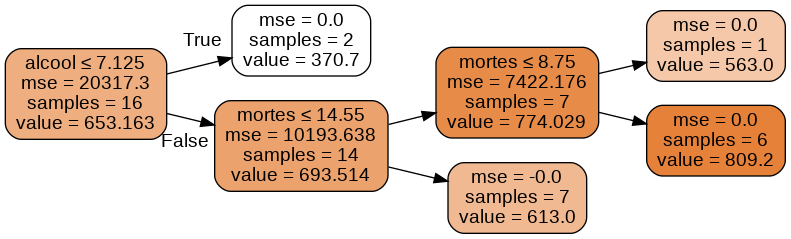

In [ ]:
# importando bibliotecas para plotar o esquema da árvore de decisão programada
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT
dot = export_graphviz(tree_model, filled=True, rounded=True, 
                      feature_names=X_train.columns, special_characters=True, 
                      rotate=True)

# plotar
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

### Informações sobre o modelo treinado
Como os dados fornecidos para o modelo foram significativamente escassos o modelo teve muita dificuldade em realizar as subpartições, resultando em um modelo desbalanceado e com desemprenho extremamente ruim, mesmo reajustando os hiperparâmetros não foi possível uma melhora das métricas, apenas redução no desempenho deste, sendo que a única métrica que realmente realçou um pouco a diminuição dos erros foi determinar o critério de análise de erros para MSE (já explicada anteriormente no modelo de Regressão Linear).

O fluxograma acima representa os passos de tomada de decisão da nossa Árvore, onde podemos analisar que as seguintes tomas de decisão devem ser realizadas para obtenção do resultado que satisfaz a questão do desafio:



*   Quando setamos alcool para 16 unidade, alcoll > 7,125 portando o caminho do valor False é trilhado;
*   Quando setamos mortes para 25, mortes > 14,55 portanto o resultado esperado desse modelo para a previsão será de **613,0 milhões de dólares**.



## Modelo escolhido

Apesar de possuir outros modelos com bases de cálculo baseadas em regressão os casos acima selecionados são os que nos dão uma visão mais detalhada de como podemos abordar nossa problemática, que cada problema exige um tratamento diferente e específico, onde cada modelo pode apresentar métricas melhores ou piores e que a exploração destes sempre é algo essencial para a obtenção dos melhores resultados.

Nossa escolha para a predição foi a **Regressão Linear** já que obtivemos métricas de análise melhores com este modelo.

Abaixo apresentamos um resumo das métricas de avalição dos modelos e evidenciamos o quanto o modelo de Regressão Linear se sobrepõe ao de Árvore de Decisão.

```
Métrica       Regressão Linear          Árvore de Decisão

R2 Score:	 0.6877551595863826        -0.35173278050758916

MAE:		  90.04456247353473         147.2142857142857

MSE:		  8261.898304101634         35766.4157142857
```

Podemos claramente notar a superioridade do modelo de Regressão linear onde tanto seus erros MAE e MSE são menores quanto seu R2 Score se aproxima de um, como já explicadas as métricas anteriormente




# Predição

Agora com modelo escolhido e treinado com a configuração ideal para nosso *Dataset* podemos resolver o questionamento proposto para o desafio:


> 1)	Considerando que o próximo filme do 007 terá 16 unidades de álcool e 25 mortes, qual o faturamento esperado? Justifique seu raciocínio e o método utilizado, apresentando também a fórmula de cálculo e suas métricas.



In [ ]:
def previsao(model, value=None):
  if not value:
    # criando um array com shape (1,2)
    value = np.array([16,25]).reshape(1,-1)
  labels = ['alcohol','kills']
  # criando dataframe com os valores acima definidos
  pred_value = pd.DataFrame(value, columns=labels)
  # realizando predição e extraindo valor numérico da lista retornada
  try:
    prediction = model.predict(pred_value)[0][0]
  except:
    prediction = model.predict(pred_value)[0]
  print('Bilheteria em milhões de US$ esperada para uma quantia de\n16 unidades de Álcool e 25 Mortes:\n','Milhões de US$: ', round(prediction, 1), sep='')

# realizando previsão
previsao(reg_model)

Bilheteria em milhões de US$ esperada para uma quantia de
16 unidades de Álcool e 25 Mortes:
Milhões de US$: 789.2


# Conclusão

Como objetivo encontramos um modelo preditivo com um *r2_score* de 0.68775 ou 68,775%, que foi capaz de nos prever um valor médio de **789,2 milhões de dólares** para o próximo filme que possua uma quantidade de 16 unidades de álcool e 25 mortes.